# Analysing Spoofed files in dev set - version 2.0 dataset

## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 spoofed confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    837 1.53546e-06 0.999998 -13.3867
    787 2.66796e-06 0.999997 -12.8342
    818 3.13078e-06 0.999997 -12.6742
    774 4.71425e-06 0.999995 -12.2649
    263 5.44733e-06 0.999995 -12.1204
    882 6.76732e-06 0.999993 -11.9034
    807 7.06049e-06 0.999993 -11.861
    786 8.35866e-06 0.999992 -11.6922
    248 8.47951e-06 0.999992 -11.6778
    819 8.50818e-06 0.999992 -11.6745
                              



In [108]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [109]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/dev_prediction.txt'

In [110]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [111]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [112]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


In [113]:
print(all_spf_scores[0:10])

['-4.07604', '-8.03727', '-4.36948', '-4.70375', '-1.91081', '-0.697803', '1.95232', '-3.31911', '-1.7775', '-0.200272']


In [114]:
spf_sort_index = np.argsort(all_spf_scores)

## Prepare file-list for top spoofed files

In [115]:
# We select all those spoofed files that got spoofed probability > 90% (We gave selection criterion score<-0.3). 
# Print the results, its fine for now. 

fname='index_file_list/allSpoofIndexList_TP.txt'
f=open(fname,'w')

spfFileList = list()
count=0

for i in spf_sort_index:
    score= all_spf_predictions[i].strip().split(' ')[2]
    if float(score) < -3.0:    #-10.0:
        spfFileList.append(str(i) + ' ' + str(all_spf_predictions[i]))
        count += 1
print('Total count = ',count)

# Reverse sort the list- so that spoofed files with highest spoof probability are on top
sorted_spfList = spfFileList[::-1]
for line in sorted_spfList:
    f.write(line+'\n')
    #print(line)
f.close()


Total count =  655


In [85]:
%%bash
cat index_file_list/allSpoofIndexList_TP.txt | head

406 4.73483e-05 0.999953 -9.95793
825 4.87546e-05 0.999951 -9.92866
891 5.13633e-05 0.999949 -9.87653
453 5.33837e-05 0.999947 -9.83795
881 5.36915e-05 0.999946 -9.8322
534 5.412e-05 0.999946 -9.82425
533 5.59461e-05 0.999944 -9.79107
284 6.28036e-05 0.999937 -9.67544
723 6.31056e-05 0.999937 -9.67064
438 6.3409e-05 0.999937 -9.66584


***Point***
> We select all those spoofed files that got spoofed probability > 90%. We have 655 spoofed files that we can use SLIME to get a reliable estimate for what the CNN might have learned about the spoofed class. Note that when running slime, for many files the SLIME returns no explanation coz we are only returning positive instance explanation. Thus we remove those files.

> Therefore, these spoofed files have been classified with > 90% probability of being spoofed

## 1) Printing few top spoofed confident correctly classified files - high scores

    Gen prob     Spf Prob      Log Liklihood ratio
    837 1.53546e-06 0.999998 -13.3867
    787 2.66796e-06 0.999997 -12.8342
    818 3.13078e-06 0.999997 -12.6742
    774 4.71425e-06 0.999995 -12.2649
    263 5.44733e-06 0.999995 -12.1204
    882 6.76732e-06 0.999993 -11.9034
    807 7.06049e-06 0.999993 -11.861
    786 8.35866e-06 0.999992 -11.6922
    248 8.47951e-06 0.999992 -11.6778
    819 8.50818e-06 0.999992 -11.6745
    854 8.9333e-06 0.999991 -11.6257
    249 1.16861e-05 0.999988 -11.3571
    817 1.21676e-05 0.999988 -11.3167
    262 1.45125e-05 0.999985 -11.1405
    216 1.61832e-05 0.999984 -11.0315
    204 1.71234e-05 0.999983 -10.975
    191 1.7362e-05 0.999983 -10.9612
    914 1.7689e-05 0.999982 -10.9425
    795 1.81139e-05 0.999982 -10.9188
    794 1.90792e-05 0.999981 -10.8669
    846 1.96264e-05 0.99998 -10.8386
    242 2.11725e-05 0.999979 -10.7628
    796 2.13798e-05 0.999979 -10.753
    832 2.29622e-05 0.999977 -10.6816
    407 2.31936e-05 0.999977 -10.6716
    821 2.4279e-05 0.999976 -10.6259
    692 2.47647e-05 0.999975 -10.6061
    833 2.54092e-05 0.999975 -10.5804
    237 2.59756e-05 0.999974 -10.5583
    761 2.66067e-05 0.999973 -10.5343
    913 3.04757e-05 0.999969 -10.3986
    809 3.80521e-05 0.999962 -10.1765
    941 3.98409e-05 0.99996 -10.1306
    751 4.05992e-05 0.999959 -10.1117
    778 4.14434e-05 0.999959 -10.0911
    823 4.48039e-05 0.999955 -10.0132

## Analysing Time: The top two components from SLIME - True positive Spoofed case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

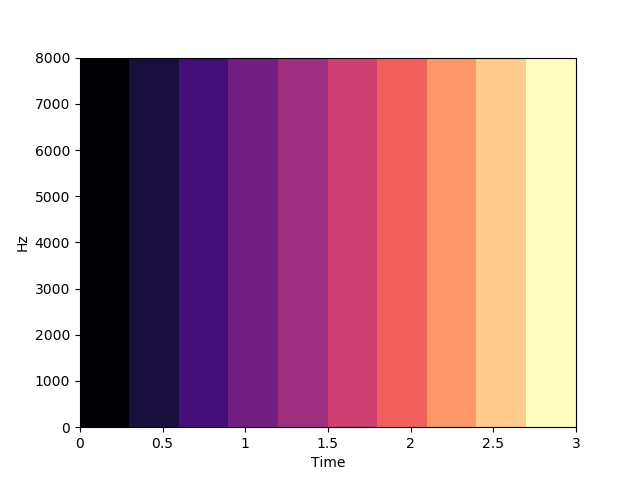

In [86]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [87]:
#file = 'top_two_explanation_indices/time/spoof_TP.txt'
file = 'top_two_explanation_indices/time/spoof_TP_box.txt'  # with signal box for spectrogram

In [88]:
%%bash
#cat top_two_explanation_indices/time/spoof_TP.txt  | head

In [89]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f if int(line.strip().split(' ')[1]) != -999]
    return top1, top2    

In [90]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [91]:
print(top2)

[9, 8, 0, 6, 8, 1, 8, 0, 8, 1, 8, 7, 1, 1, 7, 1, 0, 8, 1, 8, 9, 1, 0, 1, 8, 1, 7]


In [92]:
print(len(top1))
print(len(top2))

417
27


In [93]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [94]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

In [95]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [96]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 401
Component 1 : 10
Component 2 : 0
Component 3 : 0
Component 4 : 0
Component 5 : 0
Component 6 : 0
Component 7 : 1
Component 8 : 5
Component 9 : 0


### Using the top1 components - given by SLIME (Time segmentation)

> On the orignal spectrogram without using the signal box

    Component 0 : 234
    Component 1 : 63
    Component 2 : 12
    Component 3 : 3
    Component 4 : 9
    Component 5 : 12
    Component 6 : 34
    Component 7 : 68
    Component 8 : 17
    Component 9 : 0
    
> Using Signal box and creating new spectrograms

    Component 0 : 401
    Component 1 : 10
    Component 2 : 0
    Component 3 : 0
    Component 4 : 0
    Component 5 : 0
    Component 6 : 0
    Component 7 : 1
    Component 8 : 5
    Component 9 : 0

    

*** Observation ***
> Top1 predictions favours the **first 300ms**. We get 234 votes from slime on old spectrograms, which is heavily dominating other components as seen above. Using signal box and recomputing the spectrograms, our assumption was correct, we get more counts for component 0, it is now 401

### Using the top2 components - given by SLIME (Time segmentation)

In [97]:
# Print distribution on top2

#order = 2
#print_component_distribution(comps, top2, order)

In [120]:
# Get those file index having component4 in top explanation

key = 0
fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    file_idxs = [line.strip() for line in f]  
    
# Write the top component index to the file and further analysis
fname='top_two_explanation_indices/time/topExplanation_list_spoof_TP_box.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==key:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        #print(file_idxs[i].strip().split(' ')[0])
        #print(file_idxs[i])
        #f.write(str(file_idxs[i])+'\n')
        
f.close()

# Pick 5 audio files for hearing

In [118]:
random_5_ids = [406,358,924,790,877]   # Spoof True positive, >90% probability
#add 1 to each to access correct file index in real world

random_5_ids = [407,359,925,791,878]   # Spoof True positive, >90% probability
base='/homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/'

In [126]:
%%bash
cp /homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/D_1000878.wav audio_files_hearing/spoof_TP/

ls audio_files_hearing/spoof_TP/

D_1000359.wav
D_1000407.wav
D_1000791.wav
D_1000878.wav
D_1000925.wav


### Note: 
> the file topExplanation_list_spoof_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all spoofed files that were correctly classified by CNN. We took files for which spoofed probability is greater than 90% and get 655 files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index.
 1. We then analysed the explanation index distribution for these 766 files and find that the component 4 

## Analysing Freq: The top two components from SLIME - True positive Spoofed

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

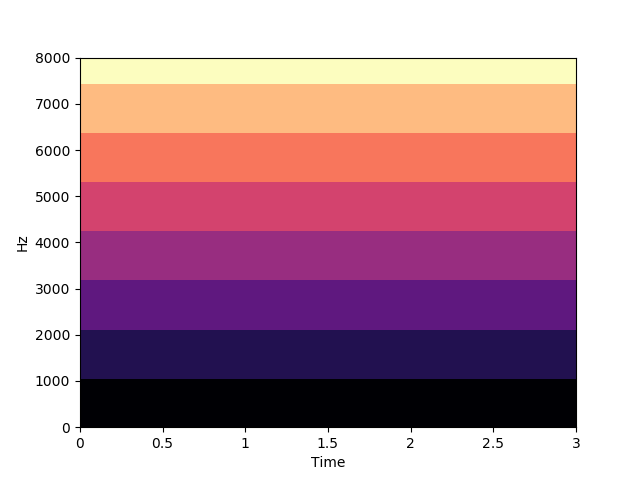

In [99]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [127]:
#file = 'top_two_explanation_indices/freq/spoof_TP.txt'
file = 'top_two_explanation_indices/freq/spoof_TP_box.txt'   # signal box -new specs

In [128]:
%%bash
#cat 'top_two_explanation_indices/freq/spoof_TP_box.txt' | head


In [129]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [130]:
print(len(top1))
print(len(top2))

631
492


## Top 1 component distribution - Frequency

In [131]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [132]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 158
Component 1 : 5
Component 2 : 9
Component 3 : 415
Component 4 : 0
Component 5 : 29
Component 6 : 15
Component 7 : 0



> Using new spectrograms, ***with signal box***

    Component 0 : 158
    Component 1 : 5
    Component 2 : 9
    Component 3 : 415
    Component 4 : 0
    Component 5 : 29
    Component 6 : 15
    Component 7 : 0

> Using old spectrograms, ***without box***

    Component 0 : 113
    Component 1 : 30
    Component 2 : 6
    Component 3 : 128
    Component 4 : 6
    Component 5 : 46
    Component 6 : 299
    Component 7 : 0

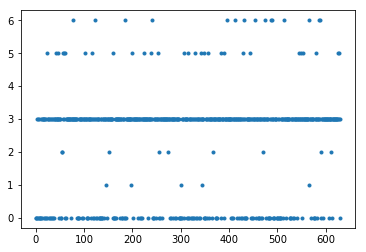

In [133]:
# Plot the distribution
plt.plot(top1,'.')

***Observation***
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 3000-4000Hz for component 3. This is different from what we saw for the genuine class (that favours highly for component 8, 7000-8000Hz)

***Out of total 655 spoofed files***
 1. 415 belongs to 4000Hz
 

**Observation: **
> In SLIME code, as I was returning two indices, for spoofed files SLIME was only returning positive index, which in many cases was only one, therefore, I put -999 as the second value (just not to break the code and make changes)

 * It give high importance to component 0, 3



In [136]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)

top = 3   # Define this value for each case of analysis

fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_spoof_TP_box.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        #print(file_idxs[i].strip().split(' ')[0])
        #print(file_idxs[i])
        #f.write(str(file_idxs[i])+'\n')
        
f.close()

# Pick 5 audio files for hearing

In [ ]:
random_5_ids = [891,153,271,390,647]   # Spoof True positive, >90% probability
#add 1 to each to access correct file index in real world

random_5_ids = [892,154,272,391,648]   # Spoof True positive, >90% probability
base='/homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/'

In [142]:
%%bash
cp /homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/D_1000648.wav audio_files_hearing/spoof_TP/

ls audio_files_hearing/spoof_TP/

D_1000154.wav
D_1000272.wav
D_1000359.wav
D_1000391.wav
D_1000407.wav
D_1000648.wav
D_1000791.wav
D_1000878.wav
D_1000892.wav
D_1000925.wav


# Overall Summary from this study (considering only top1 explanation)

**Time segmentation**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 655 True-positive spoofed files (with probability > 90%), the highest influence is shown for **component 0** that corresponds to **first 300ms**. We get 234 votes from slime.


**Frequency segmentation**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, we see that the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 4000Hz and 1000Hz.


> ***NOTE: In genuine case we got highest vote for 8000Hz bin***


** Correlation between time,frequency **

> Under time analysis we found that the model is highly influenced for first 300ms signal. This relates to the fact that the model seem to exploit information related to DTMF tone that was used for concatenating the original RedDots genuine signal to create spoofed counterparts. SLIME seems to explain this very fact, as we find 234 votes for the spoofed signals with probability greater than 90%. We may still want to double check this fact by just taking the spoofed files with highest probability !

> Next interesting observation we find is by doing frequency analysis, we see that spoofed class is looking at the high frequency

> To write properly !!

 